# Part I - (Ford GoBike System Data)
## by (FARIS ALMUQBIL)

## Introduction

## Preliminary Wrangling

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.



In [40]:
# load my data
def load_data(filepath):
    return pd.read_csv(filepath)
file = '201902-fordgobike-tripdata.csv'
df = load_data(file)

In [41]:
def dataframe_info(df):
    print("=" * 40)
    print("DataFrame Info:")
    print("=" * 40)
    df.info()
    print("\nNumber of rows and columns:", df.shape)
    print("=" * 40)

In [42]:
# check for data name and data type
dataframe_info(df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  f

In [43]:
# print first 3 rows
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [44]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [45]:
# print the data types for each
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [46]:
# check for null values

df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [47]:
# check for duplicated values
df.duplicated().sum()

0

### Data Cleaning

In [48]:
# Task 1, drop rows with null values

df.dropna(inplace=True)

In [49]:
# Task2
# Change data type
# duration_sec to int32
df['duration_sec'] = df['duration_sec'].astype('int32')
# start_time and end_time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# bike_id column to int16
df['bike_id'] = df['bike_id'].astype('int16')

In [50]:
# check the result before move
df[['duration_sec', 'start_time', 'end_time', 'bike_id']].dtypes

duration_sec             int32
start_time      datetime64[ns]
end_time        datetime64[ns]
bike_id                  int16
dtype: object

In [51]:
# check all with .info()
dataframe_info(df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int32         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int16         
 12  user_

In [52]:
df.describe()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952,174952,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,2019-02-15 21:27:05.282492160,2019-02-15 21:38:49.784215040,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,2019-02-08 08:32:16.954249984,2019-02-08 08:42:33.415500032,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,2019-02-15 22:20:21.685499904,2019-02-15 22:33:41.234500096,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,2019-02-22 11:22:05.289500160,2019-02-22 11:37:06.322249984,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000
std,1642.204905,NaN,NaN,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731


In [53]:
# check for null values

df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [54]:
# check for duplicated values
df.duplicated().sum()

0

In [55]:
# show number of unique values for some variables
print(f"Gender unique vales: {df['member_gender'].nunique()}")
print(f"Start Stations unique vales: {df['start_station_name'].nunique()}")
print(f"End Stations unique vales: {df['end_station_name'].nunique()}")
print(f"User type unique vales: {df['user_type'].nunique()}")
print(f"Bike share unique vales: {df['bike_share_for_all_trip'].nunique()}")

Gender unique vales: 3
Start Stations unique vales: 329
End Stations unique vales: 329
User type unique vales: 2
Bike share unique vales: 2


In [56]:
df['member_gender'].unique()
# Here we have other, so I will drop them
df.drop(df[df['member_gender'] == 'Other'].index, inplace=True)

In [57]:
# vales counts fo some
print(f"Gender: {df['member_gender'].value_counts()}")
print(f"Start Stations: {df['start_station_name'].value_counts()}")
print(f"End Stations: {df['end_station_name'].value_counts()}")
print(f"User type: {df['user_type'].value_counts()}")
print(f"Bike share: {df['bike_share_for_all_trip'].value_counts()}")

Gender: member_gender
Male      130500
Female     40805
Name: count, dtype: int64
Start Stations: start_station_name
Market St at 10th St                                         3576
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3370
Berry St at 4th St                                           2910
Montgomery St BART Station (Market St at 2nd St)             2643
Powell St BART Station (Market St at 4th St)                 2576
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     6
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: count, Length: 329, dtype: int64
End Stations: end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4584
Market St at 10th St 

### What is the structure of your dataset?

> This dataset pertains to bike-sharing trips in the San Francisco Bay Area, collected by the Ford GoBike program (now part of the Bay Wheels bike-sharing system), It includes detailed records of individual trips made by users, capturing information about the duration, start and end locations, user demographics, and bike-sharing patterns.

### What is/are the main feature(s) of interest in your dataset?

> I am interesting to find the pattern for those users.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Duration and birthday and the gender!

## Univariate Exploration

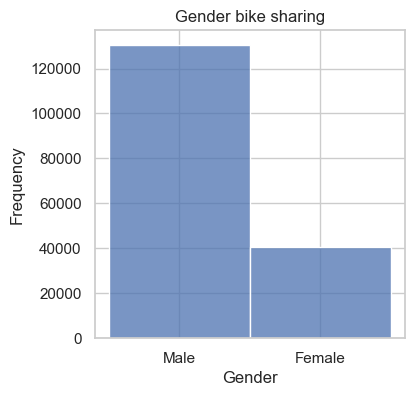

In [58]:
# use of histogram
plt.figure(figsize=(4, 4));
sns.histplot(data=df, x='member_gender');
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title('Gender bike sharing');

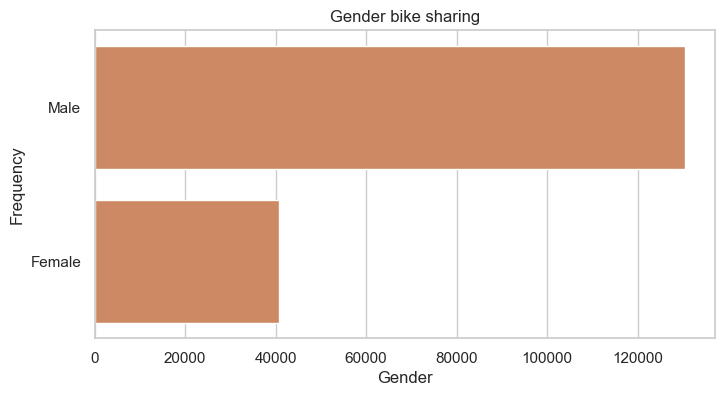

In [59]:
# use of couplot
plt.figure(figsize=(8, 4));
sns.countplot(data=df, y='member_gender', color=sns.color_palette()[1]);
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title('Gender bike sharing');

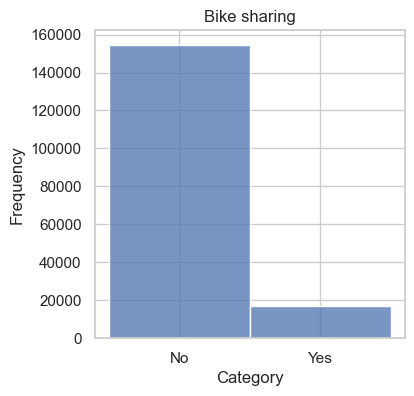

In [60]:
# use of histogram
plt.figure(figsize=(4, 4));
sns.histplot(data=df, x='bike_share_for_all_trip');
plt.xlabel('Category');
plt.ylabel('Frequency');
plt.title('Bike sharing');

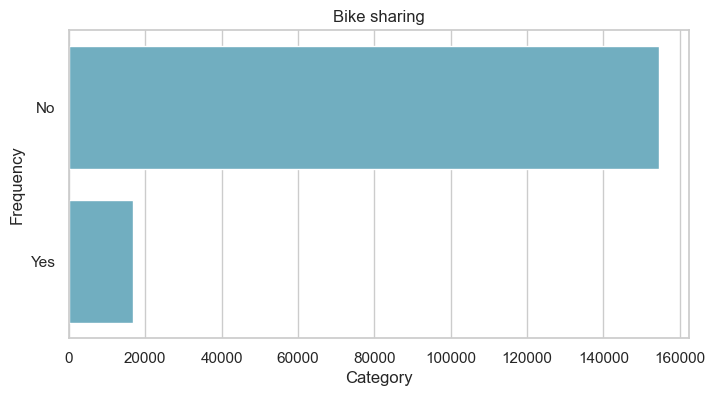

In [61]:
# use of couplot
plt.figure(figsize=(8, 4));
sns.countplot(data=df, y='bike_share_for_all_trip', color=sns.color_palette()[9]);
plt.xlabel('Category');
plt.ylabel('Frequency');
plt.title('Bike sharing');

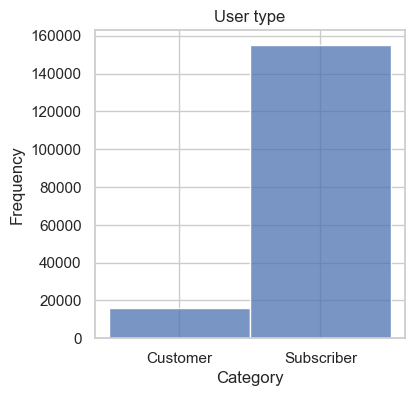

In [62]:
# use of histogram
plt.figure(figsize=(4, 4));
sns.histplot(data=df, x='user_type');
plt.xlabel('Category');
plt.ylabel('Frequency');
plt.title('User type');

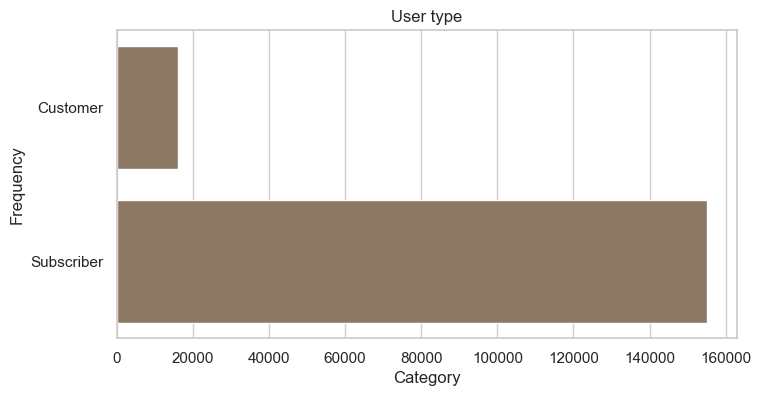

In [63]:
# use of couplot
plt.figure(figsize=(8, 4));
sns.countplot(data=df, y='user_type', color=sns.color_palette()[5]);
plt.xlabel('Category');
plt.ylabel('Frequency');
plt.title('User type');

## Q1 How do trip durations or frequencies differ by gender or age group?


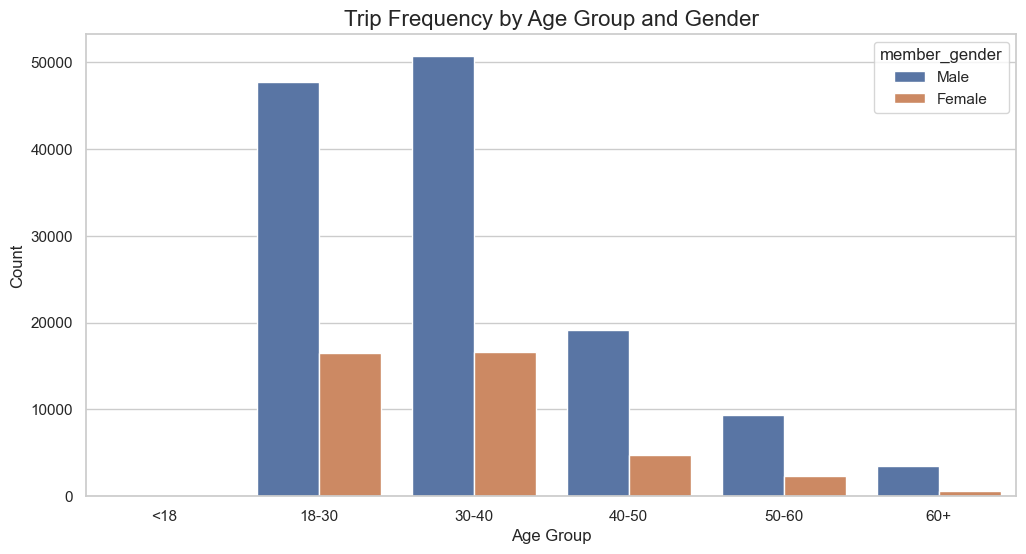

In [64]:
# an age column based on member_birth_year
current_year = 2020
df['age'] = current_year - df['member_birth_year']

#filter out any unreasonable age, only above 0 and under 100
df = df[(df['age'] > 0) & (df['age'] <= 100)]

# Set up the plot style
sns.set(style="whitegrid")
# Plot trip frequency by age group
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(12, 6));
sns.countplot(data=df, x='age_group', hue='member_gender');
plt.title('Trip Frequency by Age Group and Gender', fontsize=16);
plt.ylabel('Count', fontsize=12);
plt.xlabel('Age Group', fontsize=12);

## Q2 What are the peak hours or days for bike usage?

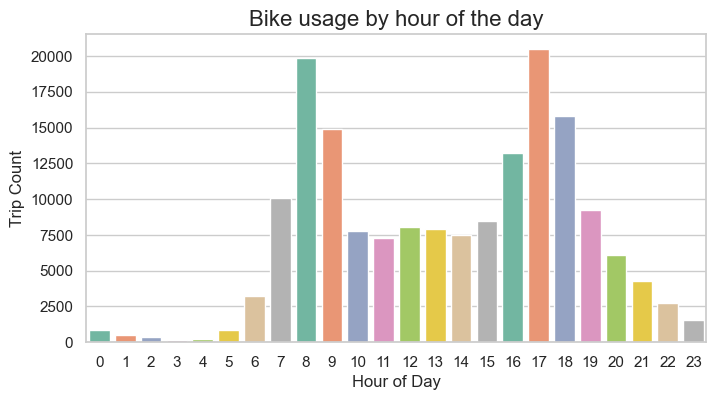

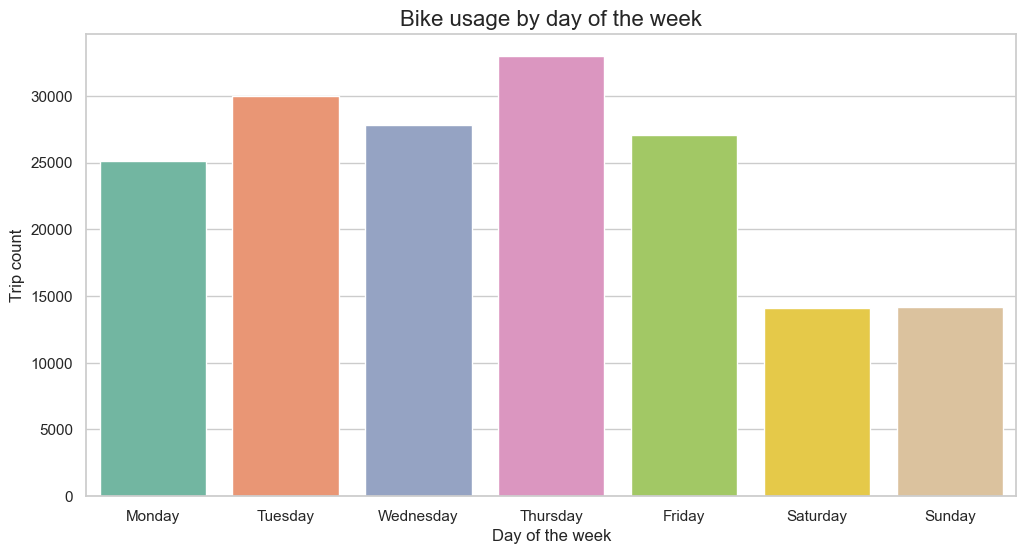

In [65]:
#extract hour and day of the week
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()

#custom color palette
palette = sns.color_palette("Set2")


plt.figure(figsize=(8, 4));
sns.countplot(data=df, x='start_hour', order=range(24), palette=palette);
plt.title('Bike usage by hour of the day', fontsize=16);
plt.xlabel('Hour of Day', fontsize=12);
plt.ylabel('Trip Count', fontsize=12);
plt.show()

# Plot bike usage by day of the week
plt.figure(figsize=(12, 6));
sns.countplot(data=df,x='start_day',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],palette=palette);
plt.title('Bike usage by day of the week', fontsize=16);
plt.xlabel('Day of the week', fontsize=12);
plt.ylabel('Trip count', fontsize=12);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As I see in the plot, number of male is 3 times than female, which may be it is popular for male more than female.
> Alse, number for those are no sharing biger than yes which is very huge.
> And number od subscriber in is very huge, while customer is very less like bike sharing.
> in all sections, male are higher than female, in group 18-30 and 30-40 are closer to each other, while else is half less.
> Time usage in morning between 7 an 9 is more popular while between 10 and 15 is static while 16 - 18 same as morning and after that it is decreasing until in 3 and 4 am is very less.
> most of the days is good for using bike whiel in saturday and sunday is less.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As I see user type and bike sharing in plot!

## Bivariate Exploration

## Q1 How does the distribution of birth years differ between genders?

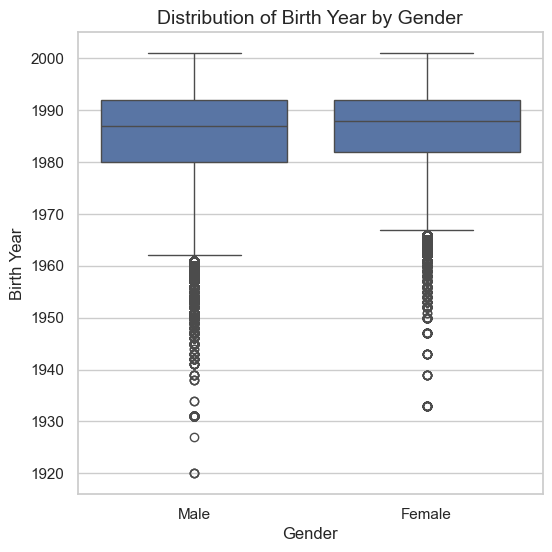

In [66]:
plt.figure(figsize=(6, 6));
sns.boxplot(data=df, x='member_gender', y='member_birth_year');
plt.xlabel('Gender', fontsize=12);
plt.ylabel('Birth Year', fontsize=12);
plt.title('Distribution of Birth Year by Gender', fontsize=14);

## Q2 Relationship between a user's birth year and the duration of their bike trips?

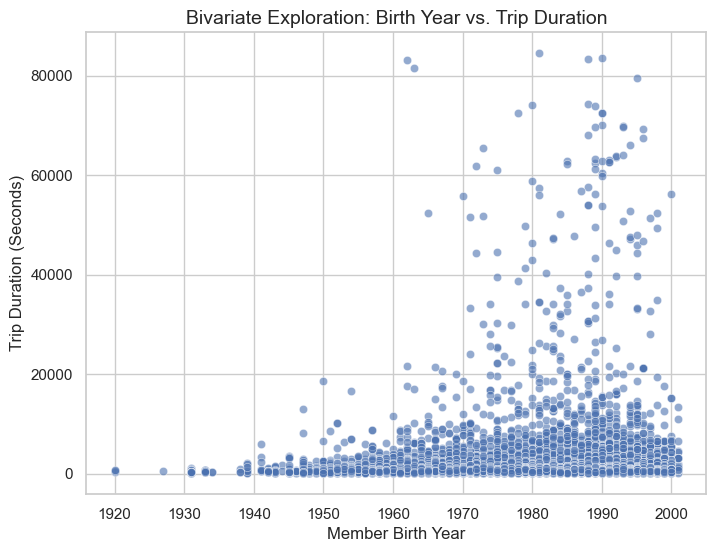

In [67]:
plt.figure(figsize=(8, 6));
sns.scatterplot(data=df, x='member_birth_year', y='duration_sec', alpha=0.6);
plt.xlabel('Member Birth Year', fontsize=12);
plt.ylabel('Trip Duration (Seconds)', fontsize=12);
plt.title('Bivariate Exploration: Birth Year vs. Trip Duration', fontsize=14);

## Q3 How does the number of bike trips vary across different days of the week for male and female users?

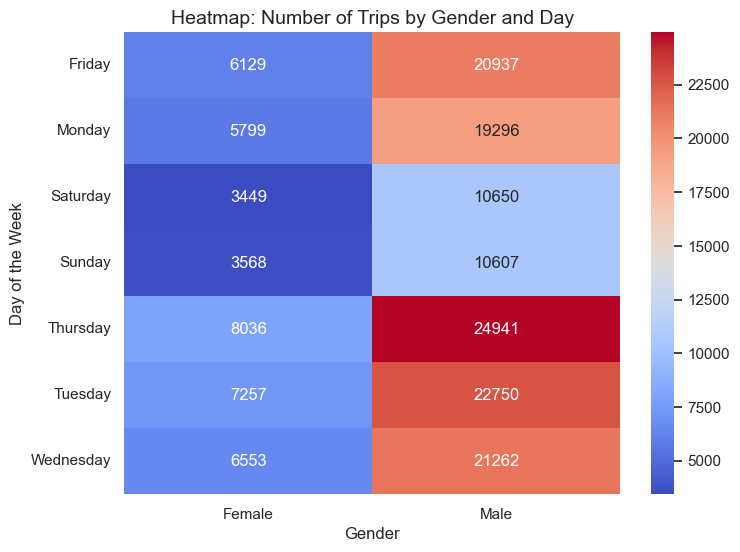

In [68]:
#pivot table for heatmap
heatmap_data = df.pivot_table(index='start_day', columns='member_gender', values='duration_sec', aggfunc='count')

#plot the heatmap
plt.figure(figsize=(8, 6));
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm');
plt.title('Heatmap: Number of Trips by Gender and Day', fontsize=14);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('Day of the Week', fontsize=12);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The analysis revealed that trip durations tend to vary significantly with user age, with younger users generally taking shorter trips. Gender differences were evident, with males showing slightly higher trip frequencies across most days of the week. Additionally, peak usage hours were aligned with typical commuting times, emphasizing the dataset's connection to urban transportation patterns.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Some interesting relationships were observed between secondary features. For instance, the distribution of bike trips across days of the week showed higher activity on weekdays compared to weekends, suggesting the service is widely used for commuting. Additionally, older users appeared less represented in the dataset, indicating that younger demographics are more frequent users of bike-sharing services. Finally, certain starting stations consistently had high trip counts, indicating potential hubs of activity in the network.

## Multivariate Exploration

### Q1 How does bike usage vary by user type (Subscriber or Customer) across different hours of the day?

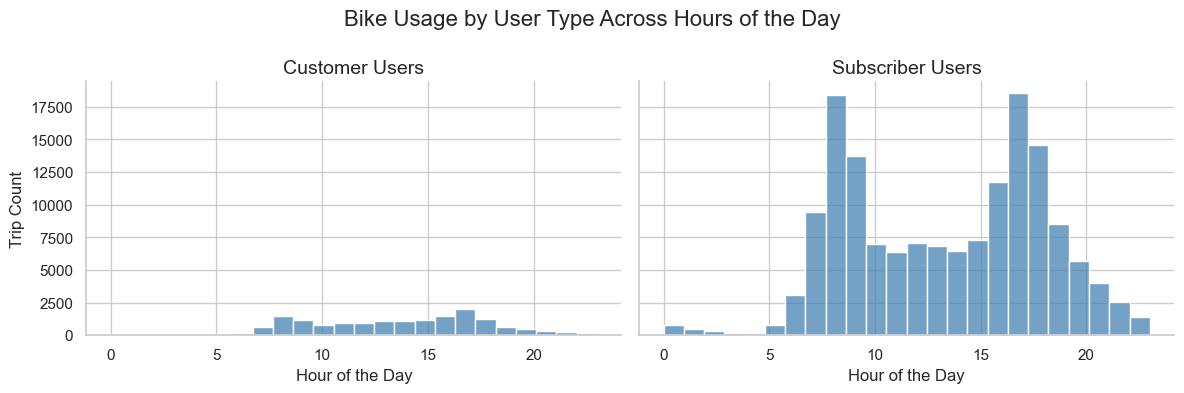

In [69]:
#extract the hour of the day
df['start_hour'] = df['start_time'].dt.hour

#facetGrid plot
g = sns.FacetGrid(df, col="user_type", height=4, aspect=1.5, sharey=True);
g.map(sns.histplot, "start_hour", bins=24, kde=False, color="steelblue");
g.set_titles(col_template="{col_name} Users", size=14);
g.set_axis_labels("Hour of the Day", "Trip Count");
g.fig.subplots_adjust(top=0.8);
g.fig.suptitle("Bike Usage by User Type Across Hours of the Day", size=16);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> yes, age is very important, as I see age above 18 and under 50 they are almost have good health which they can use bike easly, and they start playing from 6am which is very good and stop around 19 pm which at this time it is decreasing.!

### Were there any interesting or surprising interactions between features?

> yes, in weekend ( saturday and sunday ) they have another activity which these days havvev less use of bike, and femnale gender number is very less when compare them with male.

## Conclusions

> Trip Patterns: Most bike trips happen during weekday mornings and evenings, showing that people use bikes for commuting.

> Gender and Age: Male users take more trips than female users, and younger people use bike-sharing services more than older people.

> Station Popularity: Some stations have a very high number of trips, showing they are popular starting points.

In [70]:
df.to_csv('ford_bike_new.csv', index=False)

In [71]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_I_exploration_template.ipynb

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 868260 bytes to Part_I_exploration_template.html
